In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("C:\\Users\\Admin\\Position_Salaries.csv")

In [3]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X= data.iloc[:,1:2].values

In [5]:
X.shape

(10, 1)

In [7]:
y= data.iloc[:,2].values

In [8]:
y.shape

(10,)

In [9]:
# Training and Testing of data
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
X_train

array([[ 5],
       [10],
       [ 2],
       [ 7],
       [ 8],
       [ 4],
       [ 1],
       [ 6]], dtype=int64)

In [13]:
X_test,y_test

(array([[3],
        [9]], dtype=int64),
 array([ 60000, 500000], dtype=int64))

In [14]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler

In [19]:
sc_x= StandardScaler()

In [20]:
sc_y=StandardScaler()

In [21]:
X= sc_x.fit_transform(X)

In [22]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [24]:
y= sc_y.fit_transform(y.reshape(-1,1))

In [25]:
# SVR
from sklearn.svm import SVR

In [26]:
regressor= SVR(kernel='rbf')

In [27]:
regressor.fit(X,y)

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [28]:
y_pred= regressor.predict(sc_x.transform(np.array([[6.5]])))

In [29]:
y_pred

array([-0.27861589])

In [31]:
y_pred=sc_y.inverse_transform(y_pred.reshape(-1,1))

In [33]:
# for 6.5 employee will have Rs 170370 Salary
y_pred

array([[170370.0204065]])

Text(0, 0.5, 'salary')

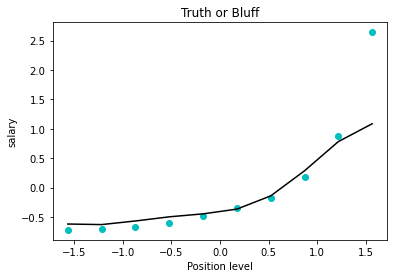

In [38]:
# Visualising 
plt.scatter(X,y,c='c')
plt.plot(X,regressor.predict(X),c='black')
plt.title("Truth or Bluff")
plt.xlabel('Position level')
plt.ylabel('salary')